In [94]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (32, 12)

In [95]:
from sklearn import datasets
from sklearn.cluster import KMeans

dataset = pd.read_csv("./heart-disease/heart.csv")
dataset.shape


(303, 14)

In [96]:
dataset[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1:]

In [98]:
y[y.target == 1].size

165

Нормализованные данные

In [99]:
from sklearn import preprocessing
X = pd.DataFrame(preprocessing.scale(X), columns=X.columns)
X[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [100]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(X)
predictions = model.predict(X)

predictions

array([4, 3, 1, 1, 2, 1, 2, 1, 4, 1, 1, 2, 1, 3, 4, 2, 2, 3, 1, 2, 1, 1,
       1, 4, 1, 2, 4, 1, 4, 4, 1, 1, 1, 3, 3, 3, 4, 3, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 4, 1, 3, 1, 4, 1,
       3, 2, 1, 2, 3, 1, 1, 1, 1, 2, 4, 1, 1, 3, 1, 1, 2, 4, 2, 2, 3, 1,
       2, 2, 4, 1, 1, 4, 1, 0, 2, 4, 1, 4, 3, 3, 2, 3, 1, 2, 4, 2, 2, 2,
       2, 4, 2, 1, 1, 1, 3, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 4, 4, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2,
       1, 2, 1, 1, 0, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 4, 3, 3, 3, 0, 0,
       4, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 3, 0, 3, 4,
       0, 2, 1, 0, 0, 4, 0, 1, 0, 0, 3, 1, 3, 0, 1, 0, 4, 4, 2, 4, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 3, 0, 1, 4, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 3, 0, 4, 4, 0, 3, 0, 0, 0, 2, 3, 4, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 3, 0, 1, 0, 1, 0, 1, 4, 0, 0, 4, 4, 1, 0, 0,
       3, 1, 0, 0, 1, 0, 4, 3, 0, 0, 2, 4, 0, 3, 4,

In [101]:
predictions[predictions == 0] = 50
predictions[predictions == 1] = 1
predictions[predictions == 2] = 1
predictions[predictions == 3] = 1
predictions[predictions == 4] = 1
predictions[predictions == 50] = 0

print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0
 1 1 0 1 1 0 1]


In [102]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=predictions))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=predictions))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=predictions))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=predictions))


accuracy =  0.7656765676567657
precision =  0.7079646017699115
recall =  0.9696969696969697
f1 =  0.8184143222506394


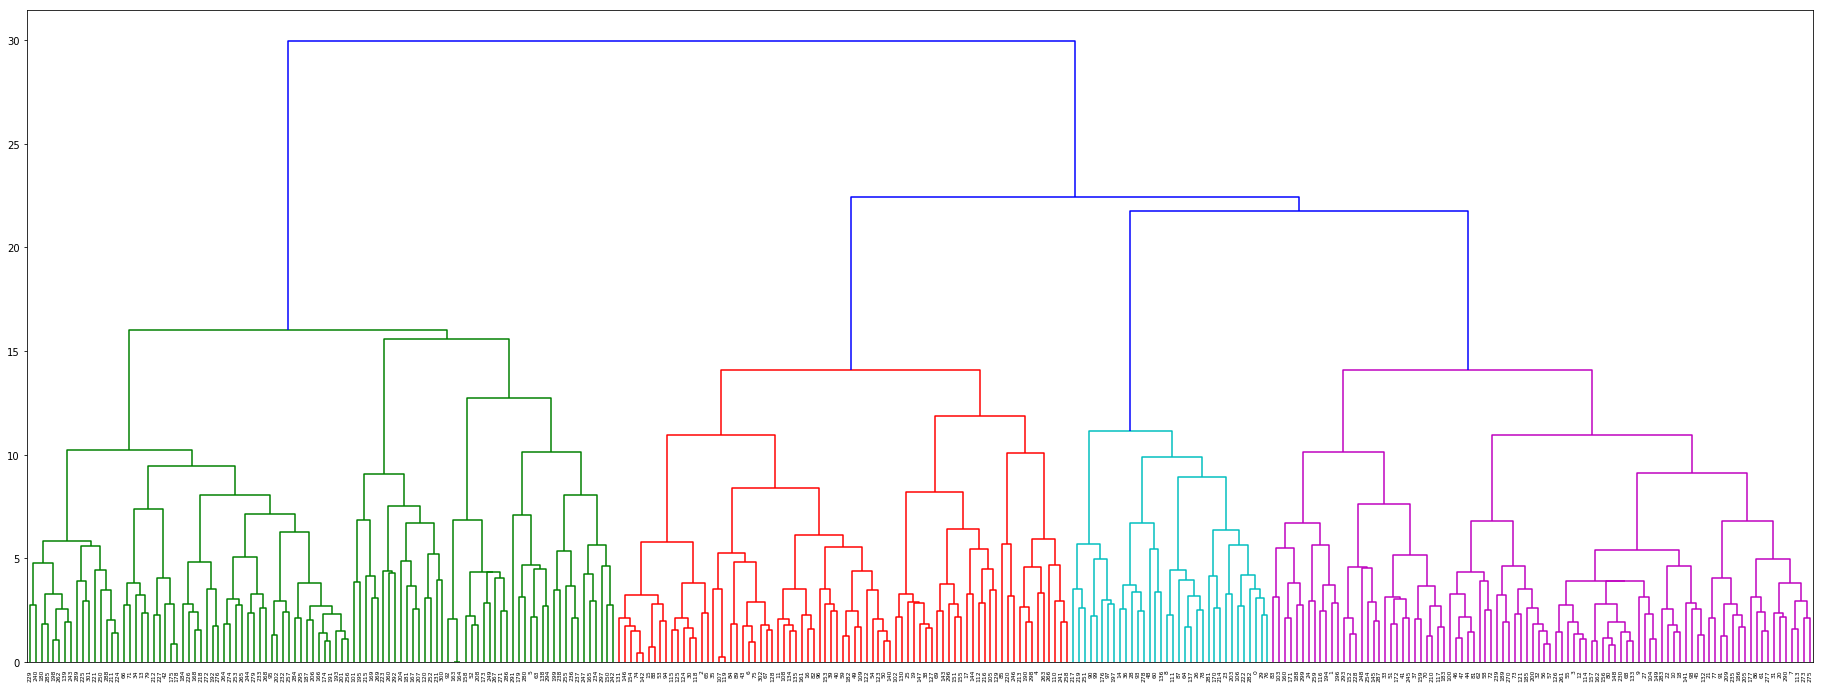

In [103]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

mergings = linkage(X, method='ward')

d = dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

In [104]:
from scipy.cluster.hierarchy import fcluster
fcl = fcluster(mergings, 5, criterion="maxclust")
fcl

array([4, 5, 3, 5, 3, 2, 3, 5, 4, 5, 5, 3, 5, 1, 4, 3, 3, 3, 5, 3, 5, 5,
       5, 4, 5, 3, 4, 5, 4, 4, 3, 5, 5, 5, 1, 3, 4, 5, 3, 3, 3, 5, 1, 3,
       5, 5, 5, 5, 4, 3, 3, 5, 2, 3, 3, 5, 5, 5, 5, 3, 4, 5, 5, 2, 4, 3,
       1, 3, 5, 3, 5, 1, 5, 5, 3, 3, 4, 5, 4, 1, 5, 5, 3, 5, 3, 3, 5, 4,
       3, 3, 4, 5, 2, 4, 3, 1, 3, 4, 5, 4, 5, 2, 3, 5, 5, 3, 4, 3, 3, 3,
       3, 4, 3, 5, 5, 3, 5, 5, 3, 3, 2, 5, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3,
       5, 5, 3, 3, 4, 4, 2, 1, 3, 5, 3, 3, 3, 5, 3, 3, 5, 5, 2, 3, 5, 3,
       3, 3, 5, 5, 2, 5, 5, 3, 5, 2, 2, 2, 1, 2, 1, 2, 4, 5, 5, 2, 1, 1,
       4, 5, 1, 2, 1, 2, 3, 5, 1, 5, 5, 1, 5, 5, 3, 1, 1, 1, 5, 2, 5, 4,
       1, 2, 5, 1, 1, 4, 2, 5, 1, 2, 2, 5, 5, 1, 1, 3, 4, 2, 3, 4, 1, 4,
       3, 1, 4, 2, 1, 1, 1, 1, 5, 1, 5, 2, 1, 1, 2, 5, 2, 2, 2, 5, 1, 3,
       2, 1, 1, 5, 3, 2, 5, 2, 1, 4, 2, 1, 5, 2, 1, 1, 3, 5, 2, 5, 1, 3,
       1, 1, 3, 2, 1, 2, 5, 2, 1, 5, 1, 5, 1, 5, 4, 1, 2, 4, 4, 5, 1, 1,
       2, 5, 1, 1, 5, 2, 2, 5, 2, 1, 3, 2, 3, 5, 2,

In [105]:
fcl[fcl==1] = 0
fcl[fcl==2] = 0
fcl[fcl==3] = 1
fcl[fcl==4] = 1
fcl[fcl==5] = 1

fcl

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [106]:
print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=fcl))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=fcl))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=fcl))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=fcl))

accuracy =  0.7491749174917491
precision =  0.7192118226600985
recall =  0.8848484848484849
f1 =  0.7934782608695652


In [107]:
from scipy.cluster.hierarchy import fcluster
fcl = fcluster(mergings, 2, criterion="maxclust")
fcl

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,

In [108]:
y[y==1].size

303

In [109]:
fcl[fcl==0]=2
fcl[fcl==1]=0
fcl[fcl==2]=1
print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=fcl))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=fcl))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=fcl))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=fcl))

accuracy =  0.7491749174917491
precision =  0.7192118226600985
recall =  0.8848484848484849
f1 =  0.7934782608695652


In [110]:
from scipy.cluster.hierarchy import cut_tree
cuttree = cut_tree(mergings, n_clusters=[2])
cuttree[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [111]:
cuttree[cuttree==0]=2
cuttree[cuttree==1]=0
cuttree[cuttree==2]=1
#cuttree

In [112]:
print ("accuracy = ", metrics.accuracy_score(y_true=y, y_pred=cuttree))
print ("precision = ", metrics.precision_score(y_true=y, y_pred=cuttree))
print ("recall = ", metrics.recall_score(y_true=y, y_pred=cuttree))
print ("f1 = ", metrics.f1_score(y_true=y, y_pred=cuttree))

accuracy =  0.7491749174917491
precision =  0.7192118226600985
recall =  0.8848484848484849
f1 =  0.7934782608695652


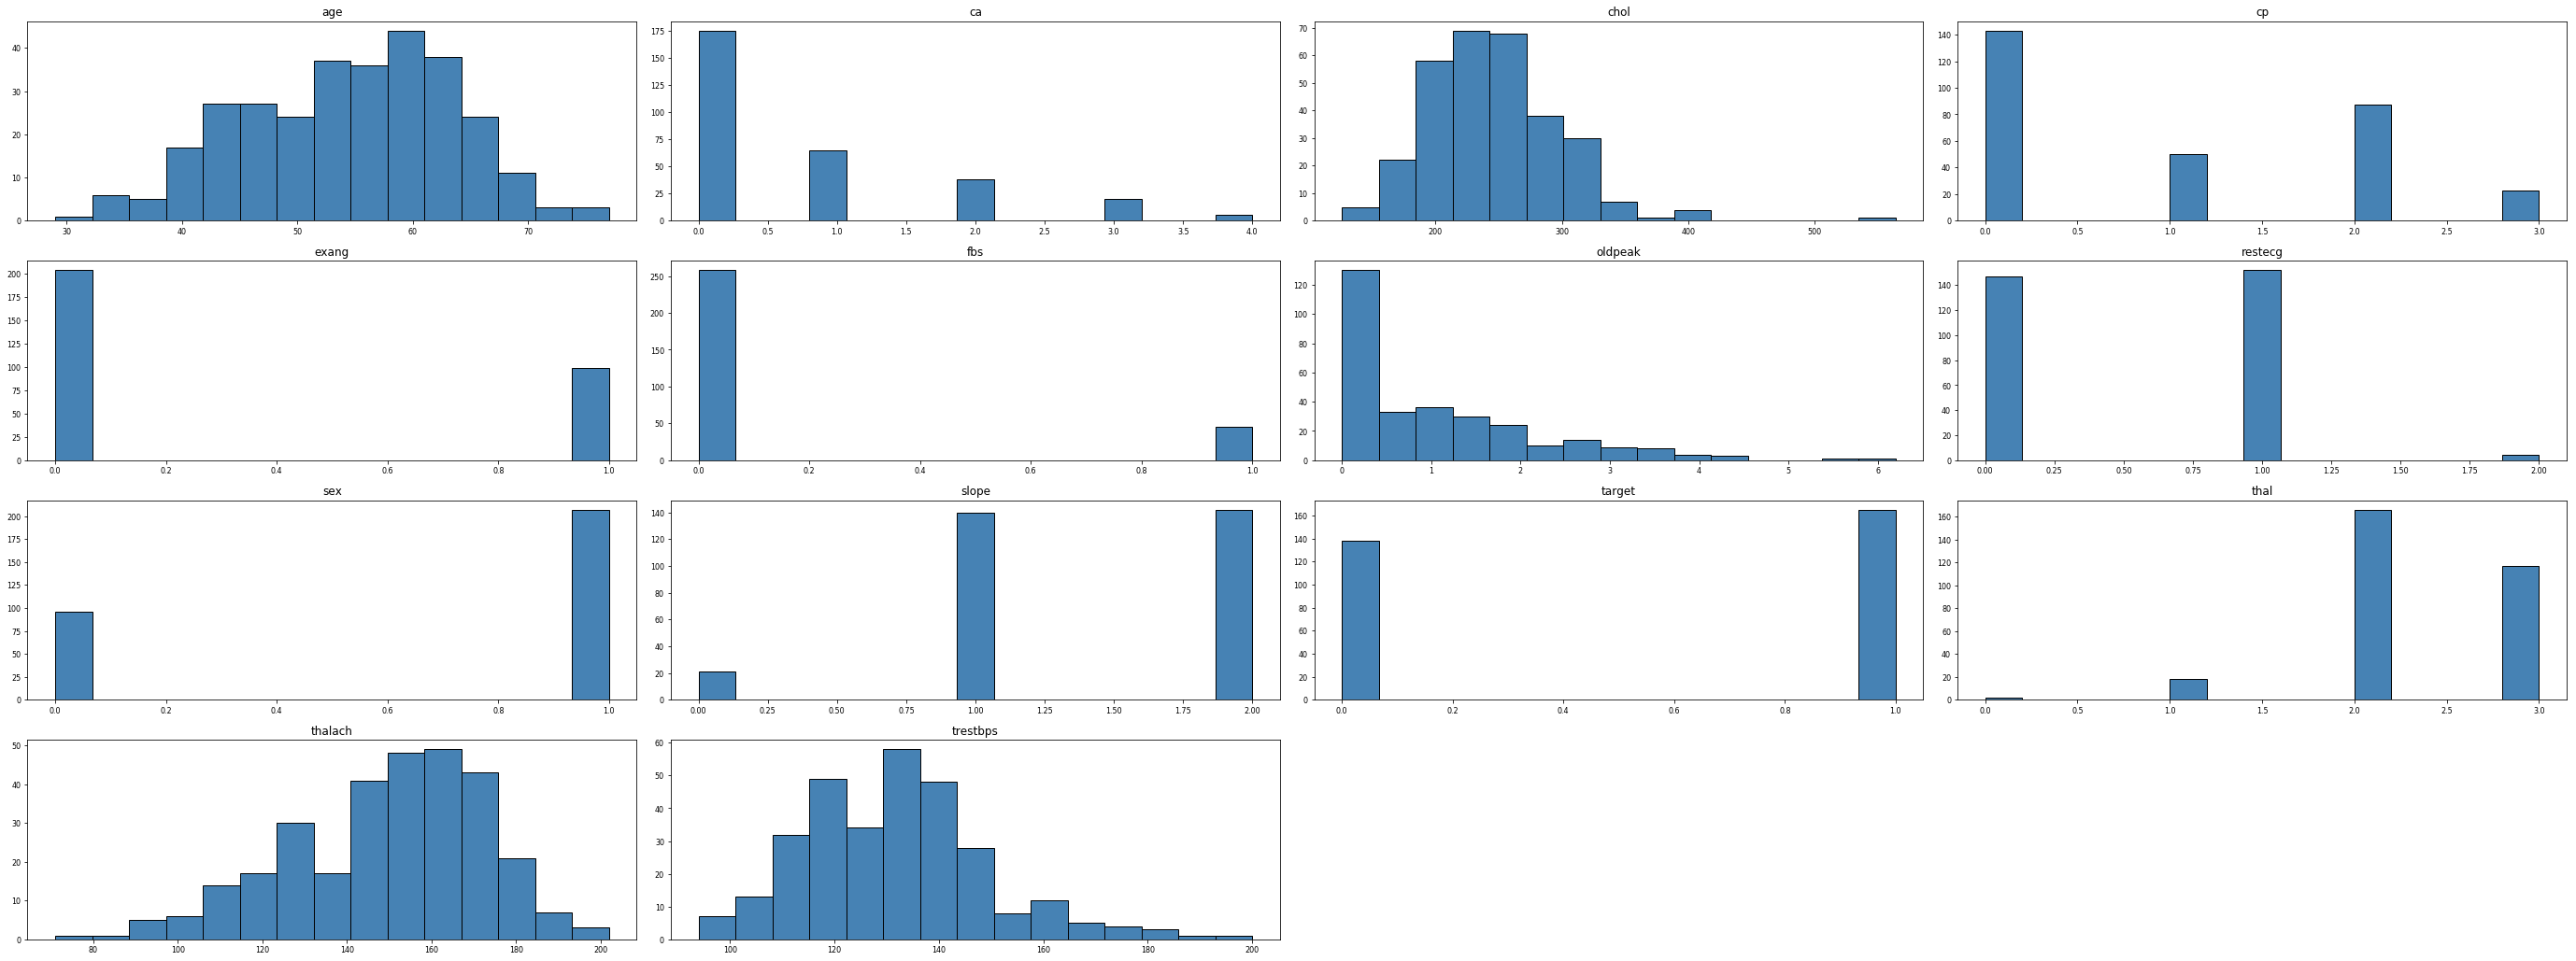

In [113]:
dataset.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

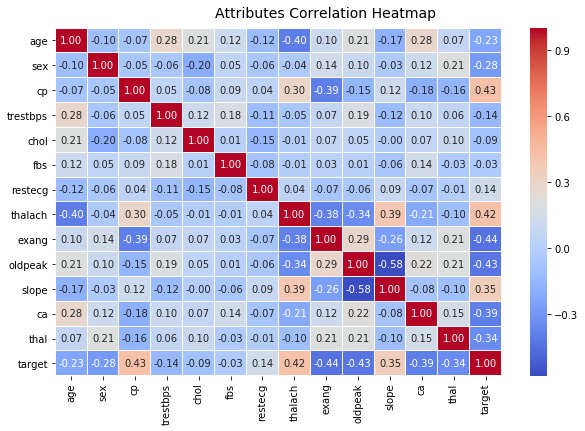

In [114]:
import seaborn as sns
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

C:\Users\dayan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dayan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dayan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


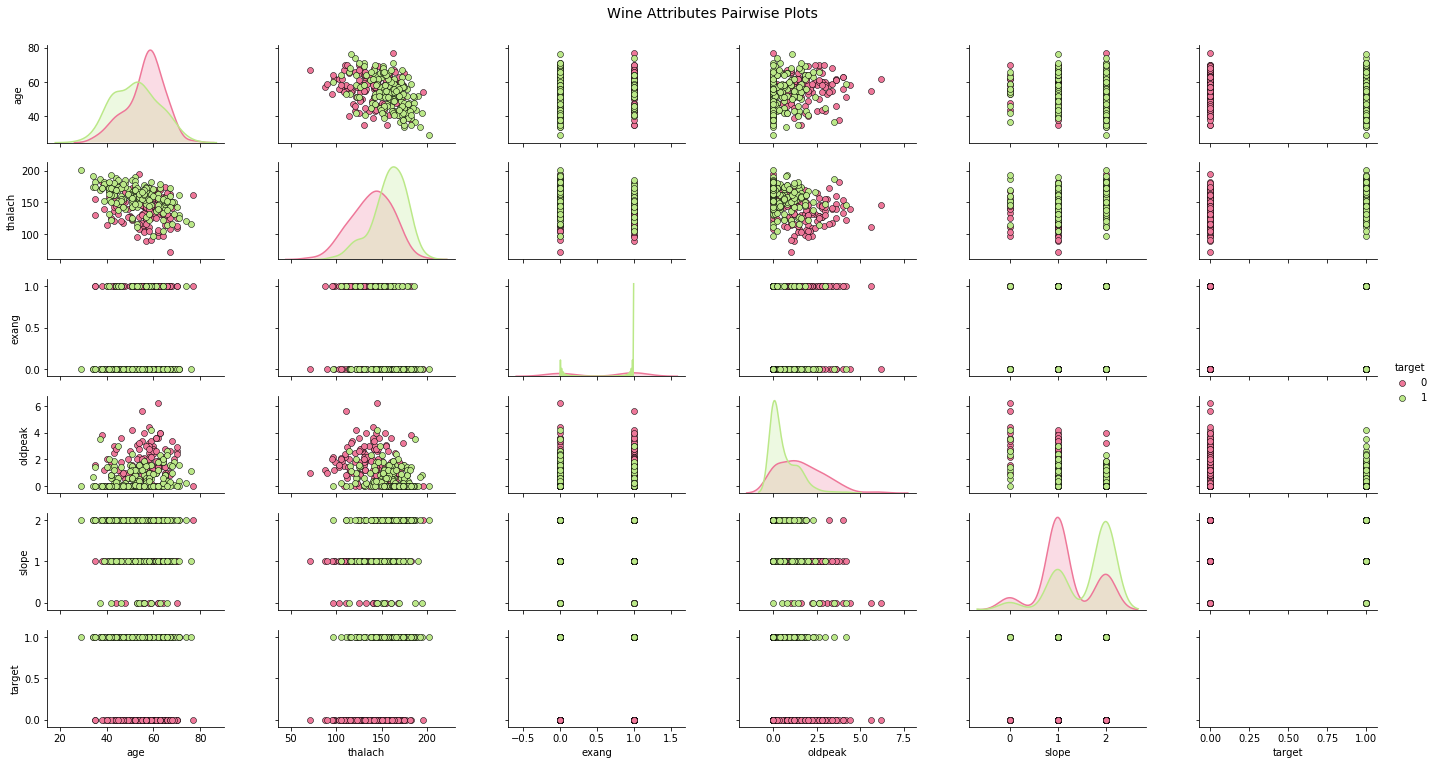

In [115]:

# Pair-wise Scatter Plots
cols = ['age', 'thalach', 'exang', 'oldpeak', 'slope', 'target']
pp = sns.pairplot(dataset[cols], hue='target', size=1.8, aspect=1.8, 
                  palette={0: "#EE7799", 1: "#BBE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

In [116]:
#dataset_pred = dataset.copy()
#dataset_pred['target'] = predictions

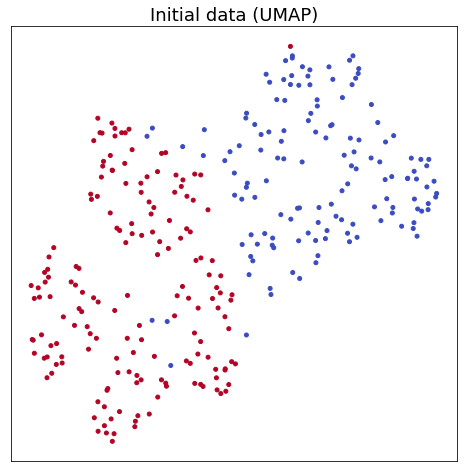

In [127]:
import umap

embedding = umap.UMAP(n_neighbors=20, min_dist=0.5, metric='canberra', random_state=28).fit_transform(dataset)

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=dataset.target, cmap="coolwarm", s=16)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Initial data (UMAP)", fontsize=18)

plt.show()

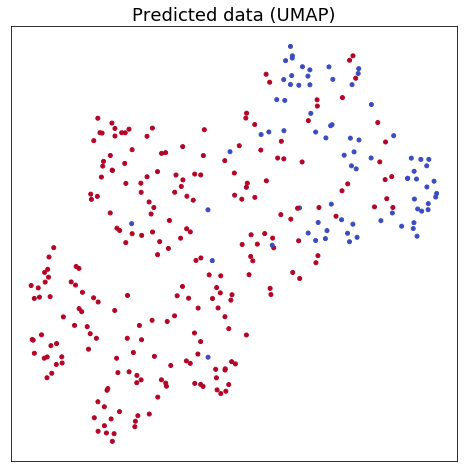

In [118]:
import umap

embedding = umap.UMAP(n_neighbors=20, min_dist=0.5,  metric='canberra', random_state=28).fit_transform(dataset) 

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=predictions, cmap="coolwarm", s=16)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Predicted data (UMAP)", fontsize=18)

plt.show()

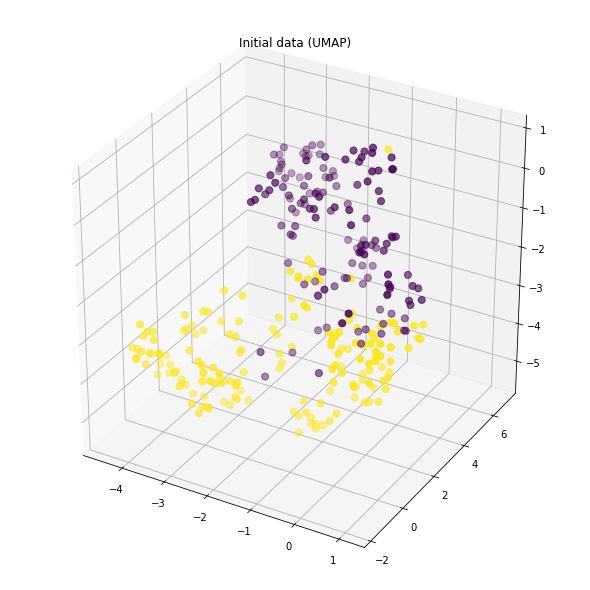

In [130]:
from mpl_toolkits.mplot3d import Axes3D
embedding = umap.UMAP(n_neighbors=15, min_dist=0.5,  metric='canberra', random_state=42, n_components=3).fit_transform(dataset) 

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(embedding[:,1], embedding[:,2], embedding[:,0], c=dataset.target, s=50)
plt.title("Initial data (UMAP)")
plt.show()

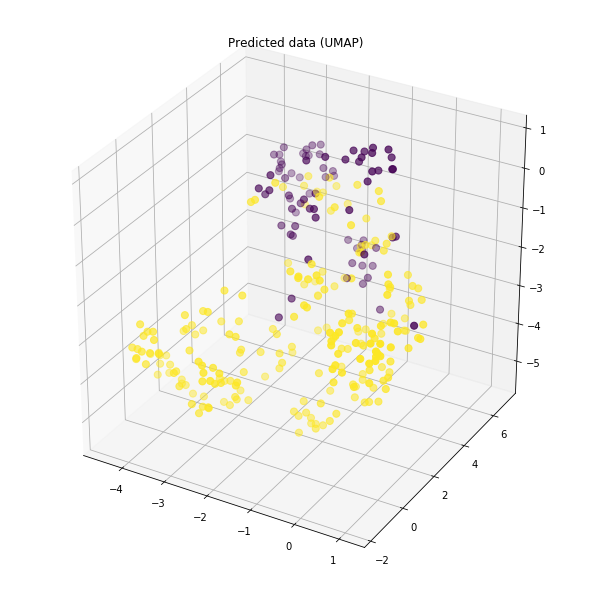

In [129]:
from mpl_toolkits.mplot3d import Axes3D
embedding = umap.UMAP(n_neighbors=15, min_dist=0.5,  metric='canberra', random_state=42, n_components=3).fit_transform(dataset) 

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)

ax.scatter(embedding[:,1], embedding[:,2], embedding[:,0], c=predictions, s=50)
plt.title("Predicted data (UMAP)")
plt.show()

In [121]:
from sklearn.manifold import TSNE

